# Oтчет о задержках внутренних авиарейсов, США 2015г.

Необходимые импорты и подготовка к работе:

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [72]:
#Таблица рейсов
df = pd.read_csv('flights.csv', dtype=str)
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,0005,...,0408,-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,0010,...,0741,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,0020,...,0811,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,0020,...,0756,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,0025,...,0259,-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
#Таблица аэропортов
airports = pd.read_csv('airports.csv')
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [74]:
#Таблица авиалиний
airlines = pd.read_csv('airlines.csv')
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


Будем работать только с рейсами с задержкой:

In [75]:
df = df.loc[~df[['DEPARTURE_TIME', 'ARRIVAL_TIME', 'ARRIVAL_DELAY']].isna().any(axis=1)]
df.ARRIVAL_DELAY = df.ARRIVAL_DELAY.astype(float)
df.DEPARTURE_DELAY = df.DEPARTURE_DELAY.astype(float)
df = df[df['ARRIVAL_DELAY'] > 0]
df = df[df['DEPARTURE_DELAY'] > 0]

# Связь задержки рейса с временем вылета?

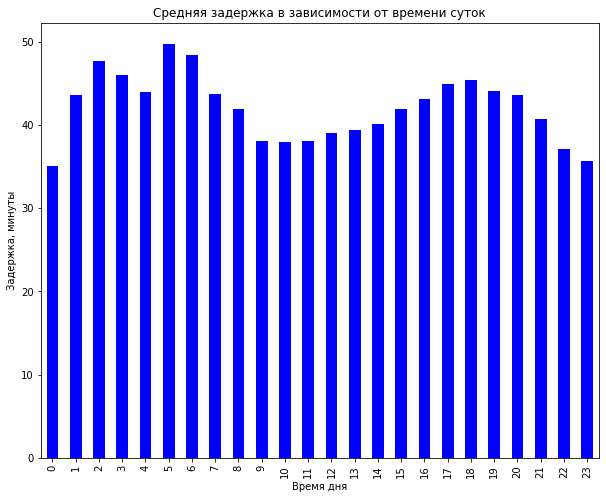

In [89]:
df['SCHEDULED_DEPARTURE_HOUR']=df['SCHEDULED_DEPARTURE'].apply(lambda x: int(x[0:2]))
df.SCHEDULED_DEPARTURE_HOUR = df.SCHEDULED_DEPARTURE_HOUR.astype(int)

plt.figure(figsize=(10, 8))
df.groupby('SCHEDULED_DEPARTURE_HOUR')['ARRIVAL_DELAY'].mean().plot(kind='bar', xlabel='Время дня', ylabel='Задержка, минуты', title='Средняя задержка в зависимости от времени суток', color='blue')
plt.show()

Наибольшая задержка наблюдается в 2-3 ночи, вероятно это связано с концом рабочего дня сотрудников аэропортов/авиалиний. Т.е. происходит смена "дневных" служащих на "ночных".

# Связь задержки рейса со временем года?

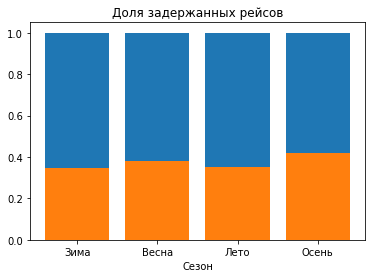

In [86]:
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])
winter_len = len(df.loc[("2015-12-01" <= df['DATE']) | ((df['DATE'] <= "2015-01-31"))])
spring_len = len(df.loc[("2015-03-01" <= df['DATE']) & (df['DATE'] <= "2015-05-31")])
summer_len = len(df.loc[("2015-06-01" <= df['DATE']) & (df['DATE'] <= "2015-08-31")])
autumn_len = len(df.loc[("2015-09-01" <= df['DATE']) & (df['DATE'] <= "2015-11-30")])

winter_delay = df.loc[("2015-12-01" <= df['DATE']) | (df['DATE'] <= "2015-01-31")][["WEATHER_DELAY"]].isna().any(axis=1).sum()
spring_delay = df.loc[("2015-03-01" <= df['DATE']) & (df['DATE'] <= "2015-05-31")][["WEATHER_DELAY"]].isna().any(axis=1).sum()
summer_delay = df.loc[("2015-06-01" <= df['DATE']) & (df['DATE'] <= "2015-08-31")][["WEATHER_DELAY"]].isna().any(axis=1).sum()
autumn_delay = df.loc[("2015-09-01" <= df['DATE']) & (df['DATE'] <= "2015-11-30")][["WEATHER_DELAY"]].isna().any(axis=1).sum()

m_delay = np.asarray([winter_delay, spring_delay, summer_delay, autumn_delay]) #всего рейсов
m_len = np.asarray([winter_len, spring_len, summer_len, autumn_len]) #колво задержанных рейсов

_, ax = plt.subplots()
ax.bar(["Зима" , "Весна", "Лето",  "Осень"], np.ones(4))
ax.bar(["Зима" , "Весна", "Лето",  "Осень"], np.divide(m_delay,m_len))
ax.set_title("Доля задержанных рейсов")
ax.set_xlabel("Сезон")
plt.show()

Процент задержанных рейсов осенью и весной возрастает (но не значительно) - это связано с частой изменчивостью погоды, необходимо проводить более точный метеопрогноз.

# Зависимость задержки от авиакомпании?

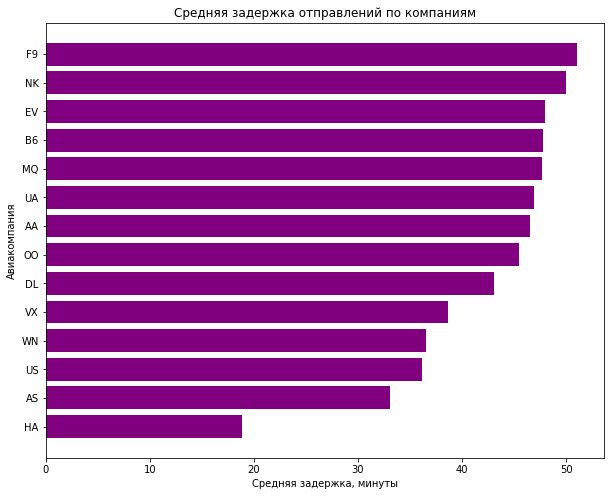

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [93]:
#оставляем только индексы авиакомпаний
df = df.loc[(df.AIRLINE.apply(len) == 2)]
#сортировка по средней задержке
ad = df.groupby('AIRLINE').mean(numeric_only=True)['DEPARTURE_DELAY'].sort_values()

plt.figure(figsize=(10, 8))
plt.barh(y = ad.index, width = ad.values, color = 'purple')
plt.xlabel("Средняя задержка, минуты")
plt.ylabel("Авиакомпания")
plt.title("Средняя задержка отправлений по компаниям")
plt.show()
airlines

Задержка рейса зависит от компании авиаперевозчика: так F9 = Frontier Airlines Inc. показывает худший результат (ожидать вылета придется на ~50 минут дольше), а HA = Hawaiian Airlines Inc наоборот - лучший (ожидание вылета ~20 минут).

# Связь количества авиаперевозок с предыдущим результатом?

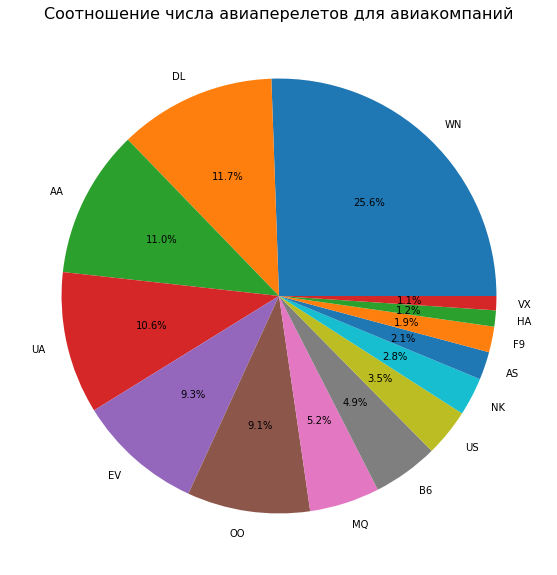

In [102]:
n_flights = sum(df.groupby('AIRLINE').size())
fig = plt.figure(figsize = (10,10))

plt.title('Соотношение числа авиаперелетов для авиакомпаний', fontsize=16)
plt.pie(df.groupby('AIRLINE').size().sort_values()[::-1]/n_flights, labels=df.groupby('AIRLINE').size().sort_values()[::-1].index, autopct='%1.1f%%')
plt.show()

Крупнейшие компании (по кол-ву перелетов) показывают среднее по рынку время ожидания (~40-45 минут), в то время как для менее крупных характерно меньшее время ожидания. Но компания F9 противоречит общему правилу и несмотря на малое количество перелетов совершает огромное количество задержек. Следовательно у F9 есть серьезные проблемы с организацией / качеством самолетов.

# Соотношение причин по которым задерживаются рейсы

При задержках менее 15 минут причины не указываются, поэтому рассмотрим рейсы, для которых задержка отправления составила больше 15 минут.

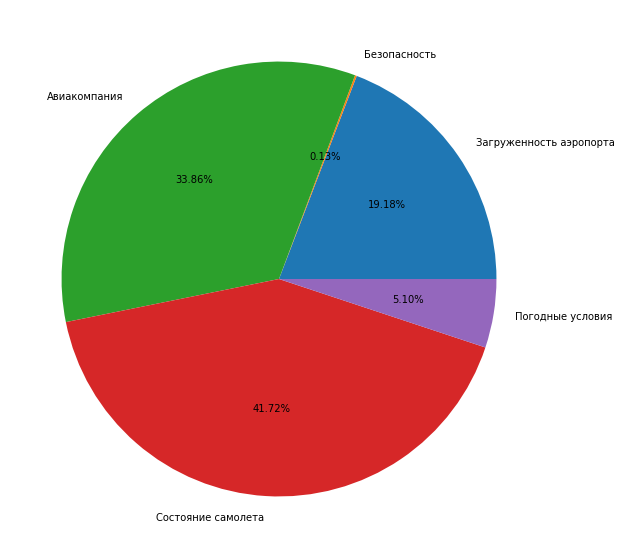

In [105]:
df = df[df['ARRIVAL_DELAY'] >= 15]
df_new = df[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY"]].astype(int)
fig = plt.figure(figsize = (10,10))
plt.pie(df_new.sum(), labels=['Загруженность аэропорта', 'Безопасность', 'Авиакомпания', 'Состояние самолета', 'Погодные условия'], autopct='%1.2f%%')
plt.show()

Погодные условия и проблемы с безопасностью реже всего влияют на задержку рейса. Чаще проблемы возникают с технической составляющей самолета, задержкой со стороны авиакомпании и загруженностью аэропорта. (Техническая часть вызвана также проблемами авиакомпании). Т.к. классификация точных причин задержек со стороны компании крайне разносторонняя, то проанализируем аэропорты и их загруженность.

# Загруженность аэропортов назначения



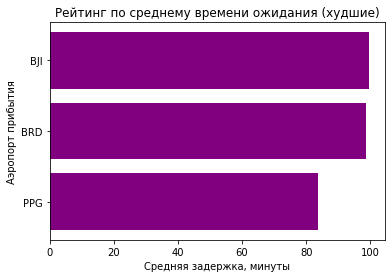

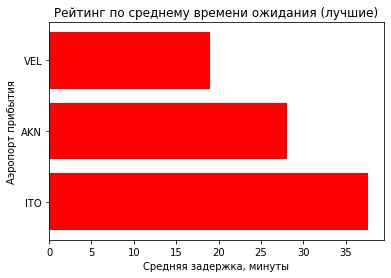

In [115]:
df = df.loc[(df.ORIGIN_AIRPORT.apply(len) == 3)]
dest_bad = df.groupby('DESTINATION_AIRPORT').mean(numeric_only=True)['ARRIVAL_DELAY'].sort_values(ascending=False).head(3)
dest_good = df.groupby('DESTINATION_AIRPORT').mean(numeric_only=True)['ARRIVAL_DELAY'].sort_values(ascending=False).tail(3)

plt.barh(y = dest_bad.index[::-1], width = dest_bad.values[::-1], color='purple')
plt.xlabel("Средняя задержка, минуты")
plt.ylabel("Аэропорт прибытия")
plt.title("Рейтинг по среднему времени ожидания (худшие)")
plt.show()

plt.barh(y = dest_good.index, width = dest_good.values, color='red')
plt.xlabel("Средняя задержка, минуты")
plt.ylabel("Аэропорт прибытия")
plt.title("Рейтинг по среднему времени ожидания (лучшие)")
plt.show()

Удивительным оказывается то, что два худших аэропорта и лучший находятся в штате Миннесота, поэтому на этом этапе нельзя однозначно сделать вывод о связи времени задержки и загруженности направления (хотя бы территориального). Для ITO - Гавайи и PPG - Калифорния интуитивное понимание происходящего есть (Гавайи не самое популярное место для регулярных поездок, в то время как Калифорния один из самых густонаселенных штатов).

# Загруженность аэропортов отправления

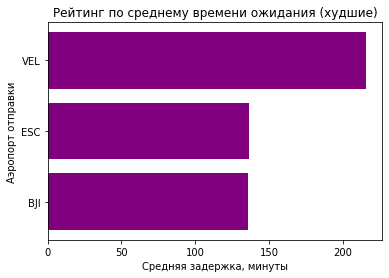

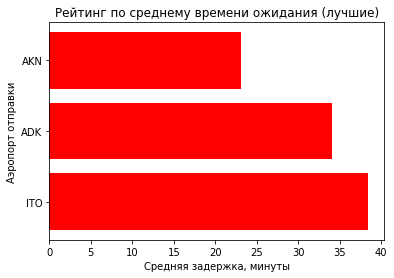

In [117]:
df = df.loc[(df.ORIGIN_AIRPORT.apply(len) == 3)]
dep_bad = df.groupby('ORIGIN_AIRPORT').mean(numeric_only=True)['DEPARTURE_DELAY'].sort_values(ascending=False).head(3)
dep_good = df.groupby('ORIGIN_AIRPORT').mean(numeric_only=True)['DEPARTURE_DELAY'].sort_values(ascending=False).tail(3)


plt.barh(y = dep_bad.index[::-1], width = dep_bad.values[::-1], color='purple')
plt.xlabel("Средняя задержка, минуты")
plt.ylabel("Аэропорт отправки")
plt.title("Рейтинг по среднему времени ожидания (худшие)")
plt.show()

plt.barh(y = dep_good.index, width = dep_good.values, color='red')
plt.xlabel("Средняя задержка, минуты")
plt.ylabel("Аэропорт отправки")
plt.title("Рейтинг по среднему времени ожидания (лучшие)")
plt.show()

Похоже, что VEL - один из аэропортов штата Миннесота компенсирует быстрое время посадки длительным временем ожидания. Один из самых несбалансированных логистически аэропортов. В следующем рассмотрении попытаемся осознать причину того, что аэропорт ITO является дважды лучшим.

# Загруженность аэропортов по количеству рейсов

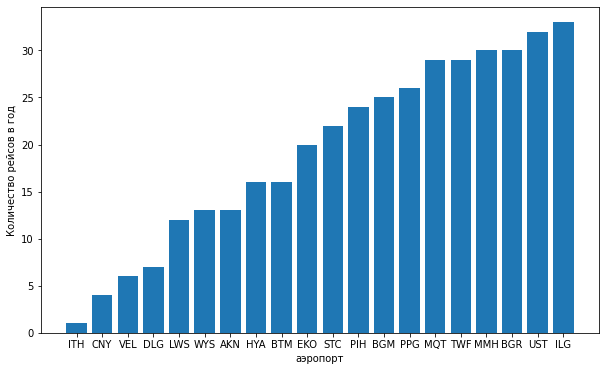

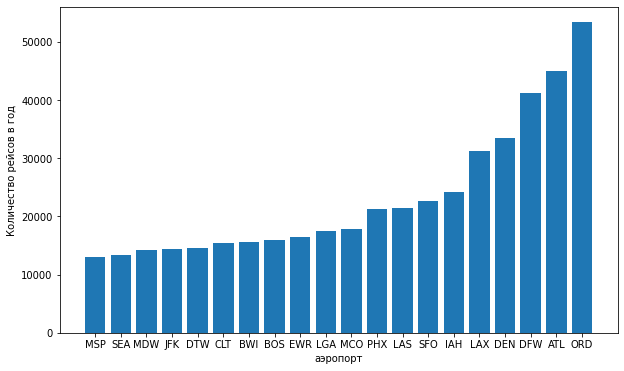

In [131]:
_AIRPORT = df.groupby('ORIGIN_AIRPORT').size().sort_values().head(20)

_, ax = plt.subplots(figsize=(10,6))

ax.bar(_AIRPORT.index, _AIRPORT)
ax.set_xlabel("аэропорт")
ax.set_ylabel("Количество рейсов в год")
plt.show()

_AIRPORT = df.groupby('ORIGIN_AIRPORT').size().sort_values().tail(20)

_, ax = plt.subplots(figsize=(10,6))

ax.bar(_AIRPORT.index, _AIRPORT)
ax.set_xlabel("аэропорт")
ax.set_ylabel("Количество рейсов в год")
plt.show()

Несмотря на низкую загруженность - VEL является (как получено выше) одним из самых несбалансировнных аэропортов, значит проблема вызвана им самим. Для остальных же результатов выше - проблемы также вызваны устройством и организацией самих аэропортов, т.к. их загруженность лежит на уровне (50 - 10000) полетов в год, что является средней загрузкой аэропорта в США.

# Связь задержки на пути и загруженностью самого пути:

In [137]:
df['ROUTE'] = df['ORIGIN_AIRPORT']  + "->" +  df['DESTINATION_AIRPORT']
a = df.groupby('ROUTE').size().sort_values().tail(10)
b = df.groupby('ROUTE')['AIRLINE_DELAY'].nunique().sort_values().tail(10)
print(np.corrcoef(a,b))
print(a,b)

[[1.        0.9695624]
 [0.9695624 1.       ]]
ROUTE
LGA->ORD    1512
ORD->DFW    1533
ORD->SFO    1536
LAX->JFK    1554
ORD->LAX    1671
LAX->LAS    1704
ORD->LGA    1892
LAS->LAX    1989
LAX->SFO    2639
SFO->LAX    2646
dtype: int64 ROUTE
BWI->ATL    139
DFW->ATL    142
LGA->ATL    142
ORD->LAX    143
SFO->LAX    145
ORD->SFO    149
LAX->HNL    149
LAX->SFO    157
JFK->LAX    164
ORD->DFW    165
Name: AIRLINE_DELAY, dtype: int64


Загруженность пути вызывает задержки, что видно и из полученных результатов (многие элементы повторяются) и из корреляции 0.96

# Рассмотрим чем вызваны задержки во времени прибытия для аэропорта VEL:

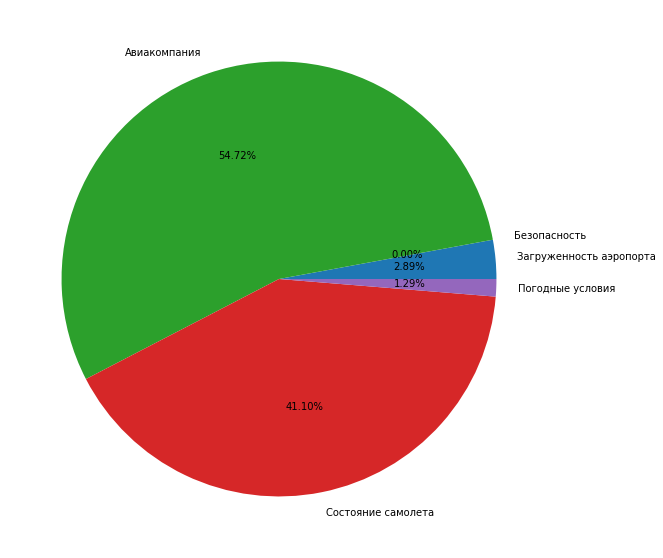

In [144]:
fig = plt.figure(figsize = (10,10))
plt.pie(df.loc[df["ORIGIN_AIRPORT"]=='VEL'][['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY"]].astype(int).sum(), labels=['Загруженность аэропорта', 'Безопасность', 'Авиакомпания', 'Состояние самолета', 'Погодные условия'], autopct='%1.2f%%')
plt.show()

VEL = Valdez Airport. Время задержки в основном вызвано авиакомпаниями и состоянием их самолетов, а не логистикой самого аэропорта.